In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("train.csv")
data.drop(['PassengerId'],axis=1,inplace=True)

In [3]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
t = data.loc[:,'SibSp'] + data.loc[:,'Parch'] + 1

In [6]:
data['family'] = t
data.drop(['SibSp','Parch'],axis=1,inplace = True)

In [7]:
data['fare_normalised'] = data.loc[:,'Fare']/data.loc[:,'family']
data.drop(['Fare'],axis=1,inplace=True)

In [8]:
data['Title'] = None
for i in range(0,len(data)):
    l = 0
    r = 0
    s = data.loc[i,'Name']
    for x in range(len(s)):
        if s[x] == ',':
            l = x+2
        if s[x] == '.':
            r = x
    data.loc[i,'Title'] = s[l:r]

In [9]:
data.drop(['Name','family'],axis=1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,Ticket,Cabin,Embarked,fare_normalised,Title
0,0,3,male,22.0,A/5 21171,NaN,S,3.62500,Mr
1,1,1,female,38.0,PC 17599,C85,C,35.64165,Mrs
2,1,3,female,26.0,STON/O2. 3101282,NaN,S,7.92500,Miss
3,1,1,female,35.0,113803,C123,S,26.55000,Mrs
4,0,3,male,35.0,373450,NaN,S,8.05000,Mr


In [10]:
df = data.drop(['Cabin'],axis = 1)

<AxesSubplot:>

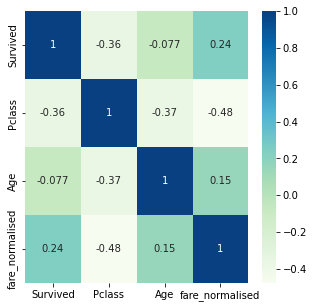

In [11]:
data_age = df.dropna()
plt.figure(figsize=(5,5))
sns.heatmap(data_age.corr(),cmap = "GnBu", annot = True)

In [12]:
cols = ['Pclass','fare_normalised','Age']
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()
A = impute_it.fit(data[cols])
A = impute_it.transform(data[cols])
A = pd.DataFrame(A)
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=2)
B = impute_knn.fit(data[cols])
B = impute_knn.transform(data[cols])
data.drop(['Age'],axis = 1,inplace=True)
B = pd.DataFrame(B)
data['Age'] = (A.iloc[:,2]+B.iloc[:,2])/2

In [13]:
for i in range(len(data)):
    if(pd.isnull(data.at[i,'Cabin'])):
        data.loc[i,'Cabin'] = 'Missing'
    else:
        data.loc[i,'Cabin'] = data.loc[i,'Cabin'][0]
        

In [14]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['Sex'] = label.fit_transform(data['Sex'])
data['Embarked'] = label.fit_transform(data['Embarked'])
data['Title'] = label.fit_transform(data['Title'])
data['Cabin'] = label.fit_transform(data['Cabin'])

In [15]:
data.drop(['Ticket'],axis=1,inplace = True)
data.head()

,Survived,Pclass,Sex,Cabin,Embarked,fare_normalised,Title,Age
0,0,3,1,7,2,3.62500,11,22.0
1,1,1,0,2,0,35.64165,12,38.0
2,1,3,0,7,2,7.92500,8,26.0
3,1,1,0,2,2,26.55000,12,35.0
4,0,3,1,7,2,8.05000,11,35.0


In [16]:
data

,Survived,Pclass,Sex,Cabin,Embarked,fare_normalised,Title,Age
0,0,3,1,7,2,3.62500,11,22.000000
1,1,1,0,2,0,35.64165,12,38.000000
2,1,3,0,7,2,7.92500,8,26.000000
3,1,1,0,2,2,26.55000,12,35.000000
4,0,3,1,7,2,8.05000,11,35.000000
...,...,...,...,...,...,...,...,...
886,0,2,1,7,2,13.00000,15,27.000000
887,1,1,0,1,2,30.00000,8,19.000000
888,0,3,0,7,2,5.86250,8,16.692732
889,1,1,1,2,0,30.00000,11,26.000000


In [17]:
data.head()

,Survived,Pclass,Sex,Cabin,Embarked,fare_normalised,Title,Age
0,0,3,1,7,2,3.62500,11,22.0
1,1,1,0,2,0,35.64165,12,38.0
2,1,3,0,7,2,7.92500,8,26.0
3,1,1,0,2,2,26.55000,12,35.0
4,0,3,1,7,2,8.05000,11,35.0


In [18]:
# data_cabin = data.dropna()

In [19]:
# data_cabin.info()

In [20]:
# for i in range(0,len(data_cabin)):
#     s = data_cabin.iloc[i,4]
#     data_cabin.loc[i,'Cabin'] = s[0:1]

In [21]:
# data_cabin['Cabin'] = label.fit_transform(data_cabin['Cabin'])

In [22]:
# plt.figure(figsize=(5,5))
# sns.heatmap(data_cabin.corr(),cmap = "GnBu", annot = True)

<AxesSubplot:>

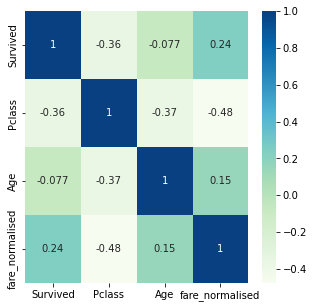

In [23]:
plt.figure(figsize=(5,5))
sns.heatmap(data_age.corr(),cmap = "GnBu", annot = True)

In [24]:
# plt.hist(data.Age,bins=20,color="red",label = "Age")
# plt.show()

In [25]:
# plt.hist(data.Fare,bins=10,color="red",label = "Age")
# plt.show()

In [26]:
# x= data['Survived'].value_counts()
# plt.bar(x.keys(),x)

In [27]:
# x= data['Pclass'].value_counts()
# plt.bar(x.keys(),x)

In [28]:
# x= data['SibSp'].value_counts()
# plt.bar(x.keys(),x)

In [29]:
# x= data['Parch'].value_counts()
# plt.bar(x.keys(),x)

In [30]:
# x= data['Embarked'].value_counts()
# plt.bar(x.keys(),x)

In [31]:
# x= data['Sex'].value_counts()
# plt.bar(x.keys(),x)

In [32]:
# plt.figure(figsize=(10,10))
# sns.heatmap(data.corr(),cmap = "GnBu", annot = True)

In [33]:
# pd.crosstab(data.Survived, data.Pclass,margins=True)

In [34]:
# sns.heatmap(pd.crosstab(data.Survived, data.Pclass,margins=True),cmap="YlGnBu", annot=True, cbar=False)

In [35]:
# sns.heatmap(pd.crosstab(data.Survived, data.SibSp,margins=True),cmap="YlGnBu", annot=True, cbar=False)

In [36]:
# sns.heatmap(pd.crosstab(data.Survived, data.Parch,margins=True),cmap="YlGnBu", annot=True, cbar=False)

In [37]:
# sns.heatmap(pd.crosstab(data.Survived, data.Gender,margins=True),cmap="YlGnBu", annot=True, cbar=False)

In [38]:
# sns.heatmap(pd.crosstab(data.Survived, data.embarked,margins=True),cmap="YlGnBu", annot=True, cbar=False)

In [39]:
# sns.barplot(x='Survived',y='Age',data=data)

In [40]:
# sns.barplot(x='Survived',y='Fare',data=data)

In [41]:
# sns.boxplot(x='Survived',y='Age',data=data,palette='rainbow')

In [42]:
# sns.boxplot(x='Survived',y='Fare',data=data,palette='rainbow')

In [43]:
# sns.boxplot(x='Age',data=data,palette='rainbow')

In [44]:
# sns.boxplot(x='Fare',data=data,palette='rainbow')

In [45]:
# data.drop(['Ticket','Cabin'],axis=1,inplace=True)

In [46]:
data.head()

,Survived,Pclass,Sex,Cabin,Embarked,fare_normalised,Title,Age
0,0,3,1,7,2,3.62500,11,22.0
1,1,1,0,2,0,35.64165,12,38.0
2,1,3,0,7,2,7.92500,8,26.0
3,1,1,0,2,2,26.55000,12,35.0
4,0,3,1,7,2,8.05000,11,35.0


In [47]:
from scipy import stats
z = np.abs(stats.zscore(data)>2)
z = pd.DataFrame(z)

In [48]:
print(z)

     Survived  Pclass    Sex  Cabin  Embarked  fare_normalised  Title    Age
0       False   False  False  False     False            False  False  False
1       False   False  False  False     False            False  False  False
2       False   False  False  False     False            False  False  False
3       False   False  False  False     False            False  False  False
4       False   False  False  False     False            False  False  False
..        ...     ...    ...    ...       ...              ...    ...    ...
886     False   False  False  False     False            False   True  False
887     False   False  False  False     False            False  False  False
888     False   False  False  False     False            False  False  False
889     False   False  False  False     False            False  False  False
890     False   False  False  False     False            False  False  False

[891 rows x 8 columns]


In [49]:
z[z['fare_normalised']==True]['fare_normalised'].sum()

23

In [50]:
data.shape

(891, 8)

In [51]:
data = data[(np.abs(stats.zscore(data)) < 2).all(axis=1)]

In [52]:
for i in len(data):
    if(data.)

SyntaxError: invalid syntax (77946508.py, line 2)

In [ ]:
data.shape

In [ ]:
print(data)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
mod = data.drop(['Survived'],axis = 1)
s.fit(mod)
mod = pd.DataFrame(s.transform(mod))

In [ ]:
print(data)

In [ ]:
X = mod.iloc[:,:]
y = data.iloc[:,0]

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(),cmap = "GnBu", annot = True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
model_params = {
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10,20]
        }
    },
    'KNN': {
        'model': neighbors.KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : range(1,100),
            'weights' : ['uniform','distance']
        }
    }, 
    'decision trees': {
        'model' : tree.DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini','entropy'],
            'splitter' : ['best','random']
        }
    },
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,5,10,20],
            'kernel': ['rbf','linear','sigmoid']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,20],
            'criterion': ['gini', 'entropy'],
        }
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

In [ ]:
log = LogisticRegression(solver='liblinear',multi_class='auto',C = 10)
KNN = neighbors.KNeighborsClassifier(n_neighbors = 59, weights = 'uniform')
dt = tree.DecisionTreeClassifier(criterion = 'gini',splitter = 'best')
svm = svm.SVC(gamma='auto',C = 1,kernel = 'rbf')
rf = RandomForestClassifier(criterion = 'gini', n_estimators = 20)
log.fit(X_train,y_train)
KNN.fit(X_train,y_train)
dt.fit(X_train,y_train)
svm.fit(X_train,y_train)
rf.fit(X_train,y_train)

In [ ]:
log_predicted = log.predict(X_test)
KNN_predicted = KNN.predict(X_test)
dt_predicted = dt.predict(X_test)
svm_predicted = svm.predict(X_test)
rf_predicted = rf.predict(X_test)

In [ ]:
#classification accuracy
from sklearn.metrics import accuracy_score
print('logistic regression:',accuracy_score(y_test,log_predicted))
print('KNN:',accuracy_score(y_test,KNN_predicted))
print('decision trees:',accuracy_score(y_test,dt_predicted))
print('svm:',accuracy_score(y_test,svm_predicted))
print('random forest:',accuracy_score(y_test,rf_predicted))

In [ ]:
from sklearn.metrics import precision_score
print('logistic regression:',precision_score(y_test,log_predicted))
print('KNN:',precision_score(y_test,KNN_predicted))
print('decision trees:',precision_score(y_test,dt_predicted))
print('svm:',precision_score(y_test,svm_predicted))
print('random forest:',precision_score(y_test,rf_predicted))

In [ ]:
from sklearn.metrics import recall_score
print('logistic regression:',recall_score(y_test,log_predicted))
print('KNN:',recall_score(y_test,KNN_predicted))
print('decision trees:',recall_score(y_test,dt_predicted))
print('svm:',recall_score(y_test,svm_predicted))
print('random forest:',recall_score(y_test,rf_predicted))

In [ ]:
from sklearn.metrics import f1_score
print('logistic regression:',f1_score(y_test,log_predicted))
print('KNN:',f1_score(y_test,KNN_predicted))
print('decision trees:',f1_score(y_test,dt_predicted))
print('svm:',f1_score(y_test,svm_predicted))
print('random forest:',f1_score(y_test,rf_predicted))

In [ ]:

gnb.fit(X_train,y_train)
gnb.score(X_test,y_test)

In [ ]:
# data_test = pd.read_csv("test.csv")
# p = data_test['PassengerId']
# data_test.drop(['PassengerId','Name','Ticket'],axis=1,inplace = True)

In [ ]:
# data_test.drop(['Cabin'],axis=1,inplace = True)
# data_test['Fare'] = data_test['Fare'].fillna(data_test['Fare'].mean())

In [ ]:
# A = impute_it.transform(data_test[cols])
# A = pd.DataFrame(A)
# B = impute_knn.transform(data_test[cols])
# data_test.drop(['Age'],axis = 1,inplace=True)
# B = pd.DataFrame(B)
# data_test['Age'] = (A.iloc[:,4]+B.iloc[:,4])/2
# from sklearn.preprocessing import LabelEncoder
# label = LabelEncoder()
# data_test['Gender'] = label.fit_transform(data_test['Sex'])
# data_test['embarked'] = label.fit_transform(data_test['Embarked'])
# data_test.drop(['Sex',"Embarked"],axis=1,inplace=True)

In [ ]:
# data_test = pd.DataFrame(s.transform(data_test))

In [ ]:
# surv = svm.predict(data_test)

In [ ]:
# df = pd.DataFrame({'PassengerId': np.array(p),'Survived':surv})
# df.to_csv("submission.csv")